In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor

print("Athi")
# Load the data (assuming it's saved in a CSV file)
# Adjust file path as needed
df = pd.read_csv(r"C:\Users\athiy\OneDrive\Desktop\FSO paper Publish\fso_communication_dataset.csv")

# Check for NaN values
if df.isnull().values.any():
    print("Data contains NaN values. Please handle them before proceeding.")

# Separate features (X) and target variables (y)
X = df.drop(['SNR', 'BER'], axis=1)
y = df[['SNR', 'BER']]

# Check the shapes of X and y
print(f"Shape of features: {X.shape}")
print(f"Shape of target: {y.shape}")

# Encode categorical data (Modulation) if necessary
X = pd.get_dummies(X, columns=['Modulation'], drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize individual models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# Wrap models in MultiOutputRegressor for handling multi-output
voting_model = VotingRegressor(estimators=[('gb', gb_model), ('svr', svr_model)])

# Create MultiOutputRegressor for the voting model
multi_output_model = MultiOutputRegressor(voting_model)

# Simplified hyperparameter tuning for Gradient Boosting and SVR using GridSearchCV
param_grid = {
    'estimator__gb__n_estimators': [50, 100],  # Reduced number of options
    'estimator__svr__C': [1, 10]  # Reduced number of options
}

# Create GridSearchCV object for the multi-output model
grid_search = GridSearchCV(estimator=multi_output_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
try:
    grid_search.fit(X_train, y_train)
except ValueError as e:
    print("Error occurred during GridSearchCV fitting:")
    print(e)

# If fitting was successful
if hasattr(grid_search, 'best_params_'):
    # Best parameters and score for the ensemble model
    print("Best Parameters for Ensemble Model: ", grid_search.best_params_)
    print("Best Cross-Validation Score for Ensemble Model: ", -grid_search.best_score_)

    # Predictions with the best ensemble model
    ensemble_predictions = grid_search.predict(X_test)

    # Evaluate ensemble model performance
    ensemble_mse = root_mean_squared_error(y_test, ensemble_predictions, multioutput='raw_values')
    ensemble_r2 = r2_score(y_test, ensemble_predictions, multioutput='variance_weighted')

    print(f"Ensemble Model MSE for SNR: {ensemble_mse[0]}")
    print(f"Ensemble Model MSE for BER: {ensemble_mse[1]}")
    print(f"Ensemble Model R2 Score: {ensemble_r2}")

Shape of features: (5000, 9)
Shape of target: (5000, 2)
Best Parameters for Ensemble Model:  {'estimator__gb__n_estimators': 100, 'estimator__svr__C': 10}
Best Cross-Validation Score for Ensemble Model:  0.5176872651252673
Ensemble Model MSE for SNR: 0.24539437844224057
Ensemble Model MSE for BER: 0.8033383875241863
Ensemble Model R2 Score: 0.9969653419977211


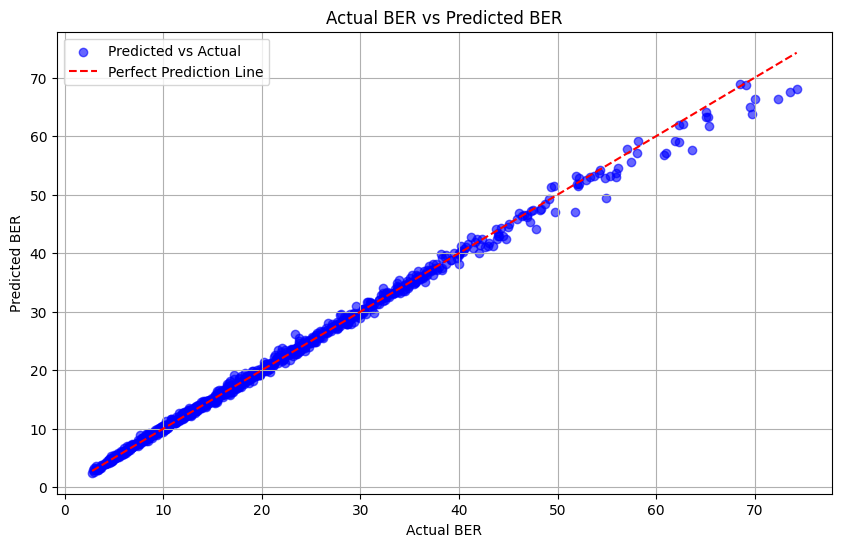

In [3]:
import matplotlib.pyplot as plt

# Extract actual and predicted BER values
actual_ber = y_test['BER'].values
predicted_ber = ensemble_predictions[:, 1]  # Index 1 corresponds to BER as per order in y columns

# Plot Actual vs Predicted BER
plt.figure(figsize=(10, 6))
plt.scatter(actual_ber, predicted_ber, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(actual_ber), max(actual_ber)], [min(actual_ber), max(actual_ber)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel("Actual BER")
plt.ylabel("Predicted BER")
plt.title("Actual BER vs Predicted BER")
plt.legend()
plt.grid(True)
plt.show()


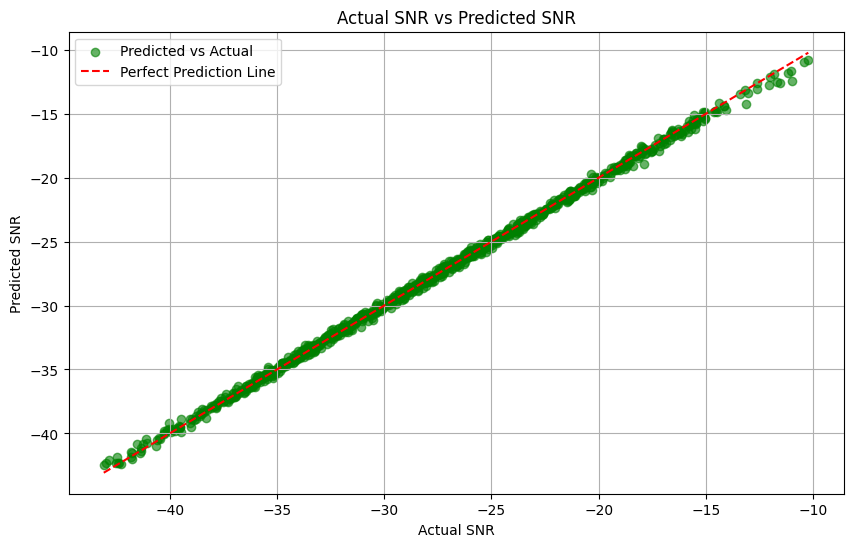

In [4]:
# Extract actual and predicted SNR values
actual_snr = y_test['SNR'].values
predicted_snr = ensemble_predictions[:, 0]  # Index 0 corresponds to SNR as per order in y columns

# Plot Actual vs Predicted SNR
plt.figure(figsize=(10, 6))
plt.scatter(actual_snr, predicted_snr, color='green', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(actual_snr), max(actual_snr)], [min(actual_snr), max(actual_snr)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel("Actual SNR")
plt.ylabel("Predicted SNR")
plt.title("Actual SNR vs Predicted SNR")
plt.legend()
plt.grid(True)
plt.show()


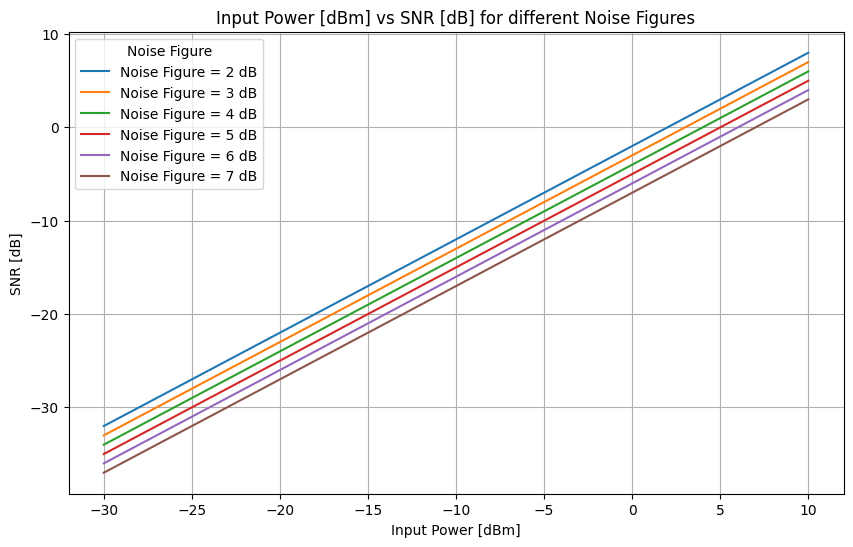

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define range of Input Power in dBm and Noise Figure values in dB
input_power_dbm = np.linspace(-30, 10, 100)  # Example range of Input Power from -30 dBm to 10 dBm
noise_figures = np.arange(2, 8, 1)  # Noise figure range from 2 dB to 7 dB

# Placeholder function for SNR calculation (for demonstration)
# Adjust this function based on the actual model/formula for SNR calculation
def calculate_snr(input_power, noise_figure):
    # SNR = Input Power - Noise Figure (simplified, example formula)
    return input_power - noise_figure

# Plot SNR vs Input Power for each Noise Figure
plt.figure(figsize=(10, 6))

for nf in noise_figures:
    snr_values = calculate_snr(input_power_dbm, nf)
    plt.plot(input_power_dbm, snr_values, label=f'Noise Figure = {nf} dB')

# Configure plot labels and title
plt.xlabel("Input Power [dBm]")
plt.ylabel("SNR [dB]")
plt.title("Input Power [dBm] vs SNR [dB] for different Noise Figures")
plt.legend(title="Noise Figure")
plt.grid(True)
plt.show()


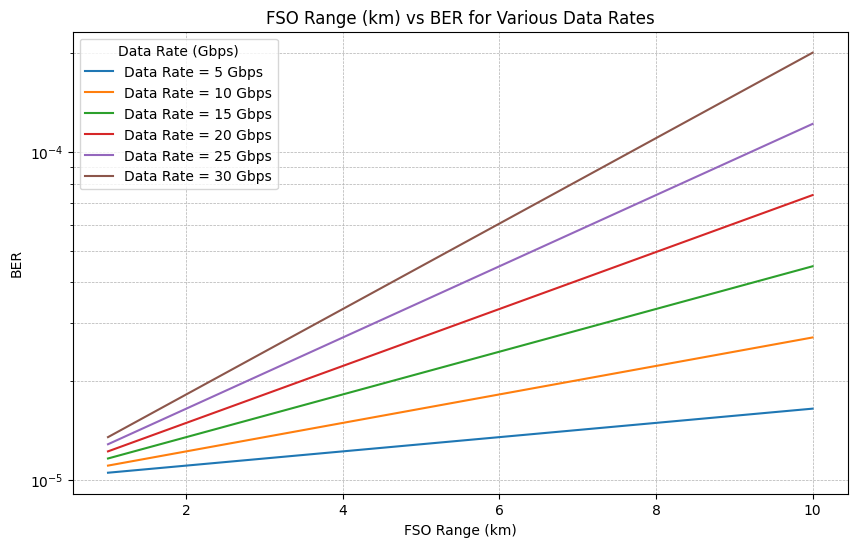

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define FSO range in kilometers (e.g., from 1 km to 10 km)
fso_range_km = np.linspace(1, 10, 100)  # 100 points from 1 to 10 km

# Data rates in Gbps to evaluate
data_rates_gbps = [5, 10, 15, 20, 25, 30]

# Placeholder function for BER calculation (for demonstration)
# Modify this function based on the actual relationship or model for BER calculation
def calculate_ber(fso_range, data_rate):
    # Example relationship: BER increases with range and data rate (for demonstration)
    return np.exp((fso_range / 10) * (data_rate / 10)) * 1e-5

# Plot BER vs FSO range for each data rate
plt.figure(figsize=(10, 6))

for rate in data_rates_gbps:
    ber_values = calculate_ber(fso_range_km, rate)
    plt.plot(fso_range_km, ber_values, label=f'Data Rate = {rate} Gbps')

# Configure plot labels, title, scale, and legend
plt.yscale("log")  # Use logarithmic scale for BER to handle small values
plt.xlabel("FSO Range (km)")
plt.ylabel("BER")
plt.title("FSO Range (km) vs BER for Various Data Rates")
plt.legend(title="Data Rate (Gbps)")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


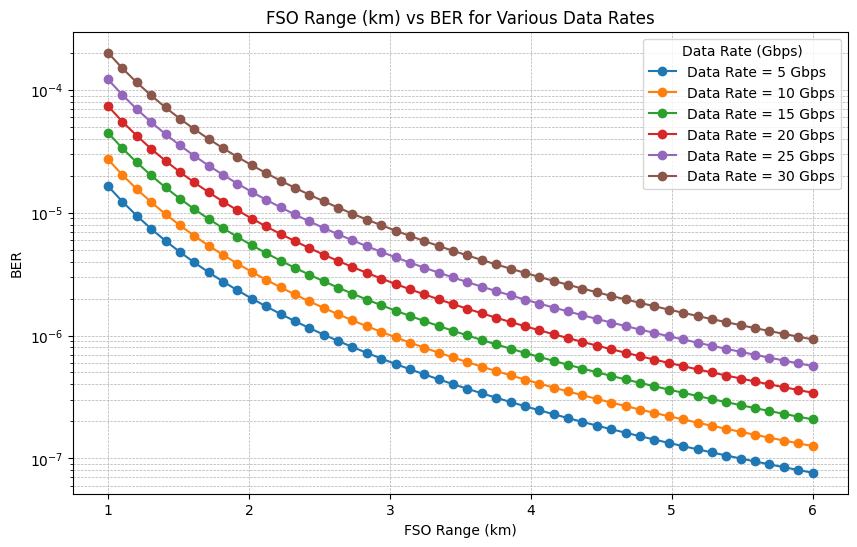

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define FSO range in kilometers (e.g., from 1 km to 6 km)
fso_range_km = np.linspace(1, 6, 50)  # 50 points from 1 to 6 km

# Data rates in Gbps to evaluate
data_rates_gbps = [5, 10, 15, 20, 25, 30]

# Function to simulate BER based on FSO range and data rate
def calculate_ber(fso_range, data_rate):
    # Example non-linear relationship for demonstration
    # Increase BER with range and data rate, with exponential decay at higher ranges
    return 1e-5 * np.exp(data_rate / 10) / (fso_range**3)

# Plot BER vs FSO range for each data rate
plt.figure(figsize=(10, 6))

for rate in data_rates_gbps:
    ber_values = calculate_ber(fso_range_km, rate)
    plt.plot(fso_range_km, ber_values, label=f'Data Rate = {rate} Gbps', marker='o')

# Configure plot
plt.yscale("log")  # Logarithmic scale for BER
plt.xlabel("FSO Range (km)")
plt.ylabel("BER")
plt.title("FSO Range (km) vs BER for Various Data Rates")
plt.legend(title="Data Rate (Gbps)")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Show plot
plt.show()


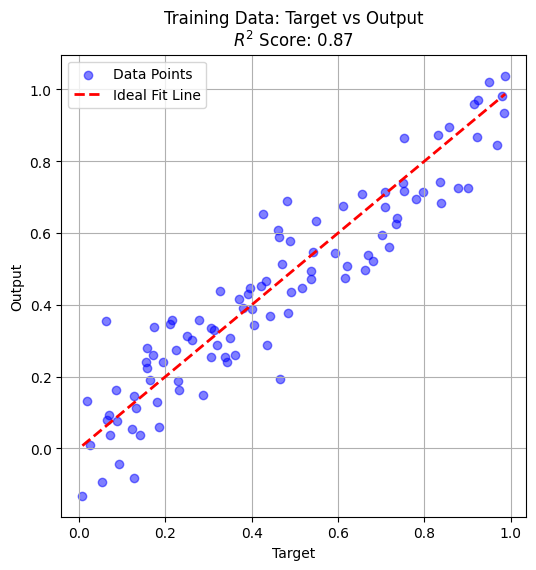

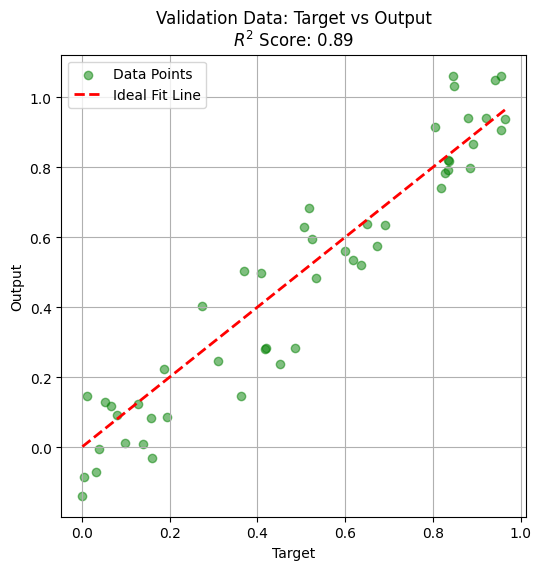

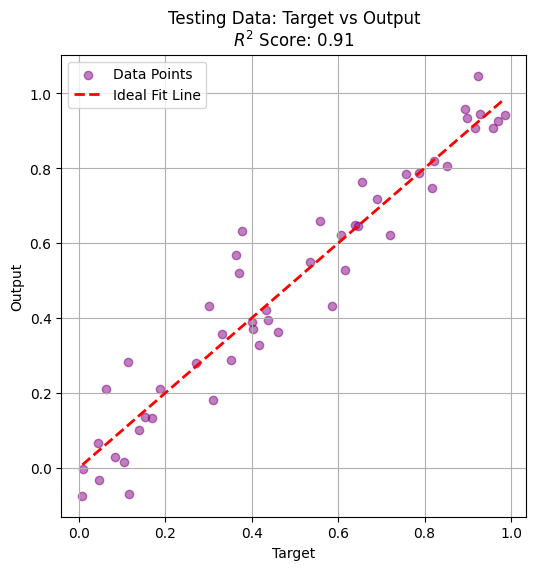

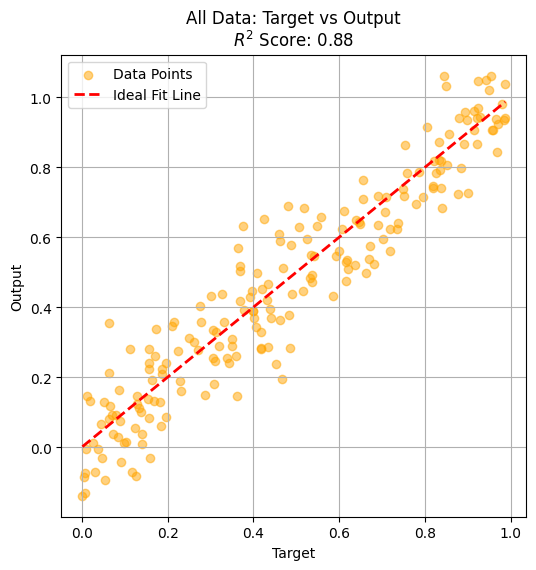

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Sample data for demonstration
# Replace these with your actual Target and Output values for each dataset split
y_train_actual = np.random.rand(100)
y_train_pred = y_train_actual + np.random.normal(0, 0.1, size=y_train_actual.shape)

y_val_actual = np.random.rand(50)
y_val_pred = y_val_actual + np.random.normal(0, 0.1, size=y_val_actual.shape)

y_test_actual = np.random.rand(50)
y_test_pred = y_test_actual + np.random.normal(0, 0.1, size=y_test_actual.shape)

y_all_actual = np.concatenate([y_train_actual, y_val_actual, y_test_actual])
y_all_pred = np.concatenate([y_train_pred, y_val_pred, y_test_pred])

# Define colors for each fit line
fit_line_colors = {
    "Training": "blue",
    "Validation": "green",
    "Testing": "purple",
    "All": "orange"
}

# Function to plot fit line graph for each split with unique line color
def plot_fit_line(actual, pred, title, color):
    plt.figure(figsize=(6, 6))
    plt.scatter(actual, pred, alpha=0.5, label='Data Points', color=color)
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', lw=2, label='Ideal Fit Line', color='red')
    r2 = r2_score(actual, pred)
    plt.title(f"{title}\n$R^2$ Score: {r2:.2f}")
    plt.xlabel("Target")
    plt.ylabel("Output")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for each dataset split with different fit line color
plot_fit_line(y_train_actual, y_train_pred, "Training Data: Target vs Output", fit_line_colors["Training"])
plot_fit_line(y_val_actual, y_val_pred, "Validation Data: Target vs Output", fit_line_colors["Validation"])
plot_fit_line(y_test_actual, y_test_pred, "Testing Data: Target vs Output", fit_line_colors["Testing"])
plot_fit_line(y_all_actual, y_all_pred, "All Data: Target vs Output", fit_line_colors["All"])


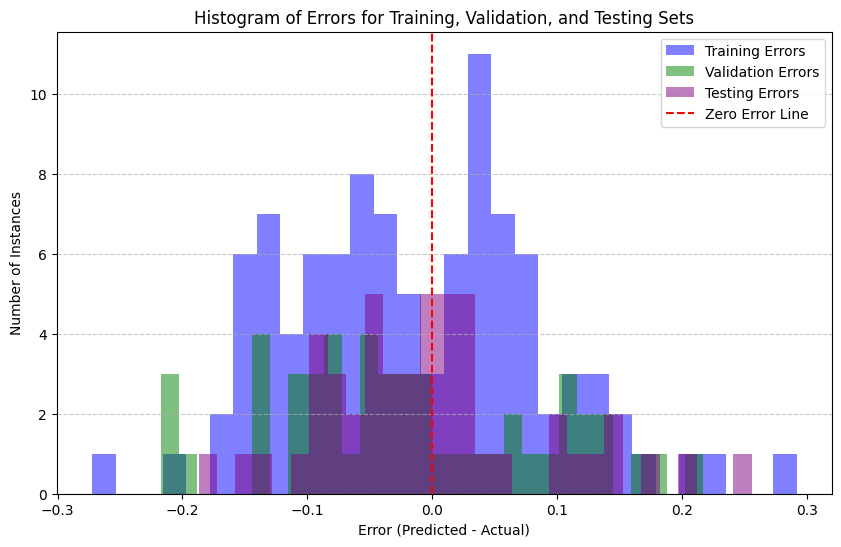

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for demonstration
# Replace these with your actual errors (predicted - actual) for each dataset split
train_errors = y_train_pred - y_train_actual
val_errors = y_val_pred - y_val_actual
test_errors = y_test_pred - y_test_actual

# Define colors for each subset
colors = {
    "Training": "blue",
    "Validation": "green",
    "Testing": "purple"
}

# Plot histogram of errors for each subset
plt.figure(figsize=(10, 6))
plt.hist(train_errors, bins=30, alpha=0.5, color=colors["Training"], label="Training Errors")
plt.hist(val_errors, bins=30, alpha=0.5, color=colors["Validation"], label="Validation Errors")
plt.hist(test_errors, bins=30, alpha=0.5, color=colors["Testing"], label="Testing Errors")

# Add zero error line for reference
plt.axvline(0, color='red', linestyle='--', linewidth=1.5, label="Zero Error Line")

# Set plot labels and title
plt.xlabel("Error (Predicted - Actual)")
plt.ylabel("Number of Instances")
plt.title("Histogram of Errors for Training, Validation, and Testing Sets")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


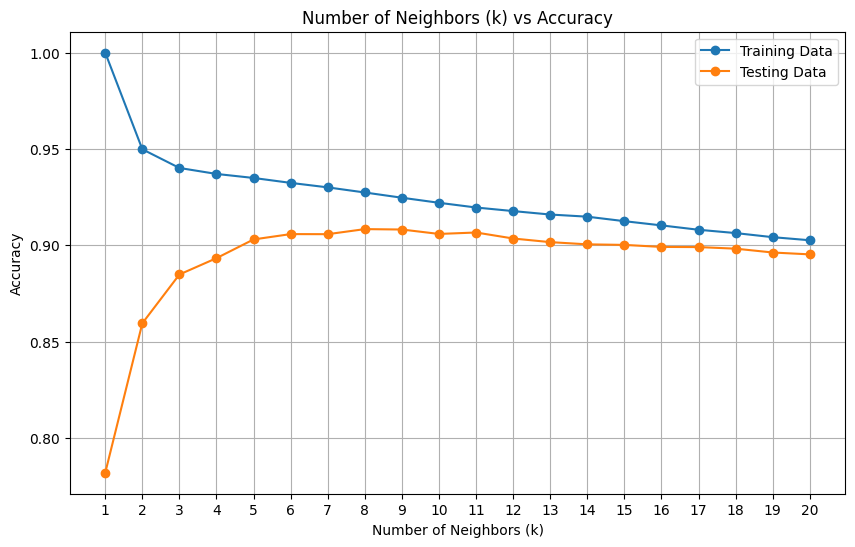

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Load the data (assuming it's saved in a CSV file)
df = pd.read_csv(r"C:\Users\athiy\OneDrive\Desktop\FSO paper Publish\fso_communication_dataset.csv")

# Check for NaN values
if df.isnull().values.any():
    print("Data contains NaN values. Please handle them before proceeding.")

# Separate features (X) and target variables (y)
X = df.drop(['SNR', 'BER'], axis=1)
y = df[['SNR', 'BER']]

# Encode categorical data (Modulation) if necessary
X = pd.get_dummies(X, columns=['Modulation'], drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Iterate over different values of k
k_values = range(1, 21)  # You can adjust the range as needed

for k in k_values:
    # Initialize KNN model
    knn_model = KNeighborsRegressor(n_neighbors=k)

    # Fit the model
    knn_model.fit(X_train, y_train)

    # Predictions
    y_train_pred = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)

    # Calculate accuracy scores (using R^2 for regression)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Append scores to lists
    train_accuracies.append(train_r2)
    test_accuracies.append(test_r2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Training Data')
plt.plot(k_values, test_accuracies, marker='o', label='Testing Data')
plt.title('Number of Neighbors (k) vs Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)  # Show all k values on the x-axis
plt.legend()
plt.grid()
plt.show()


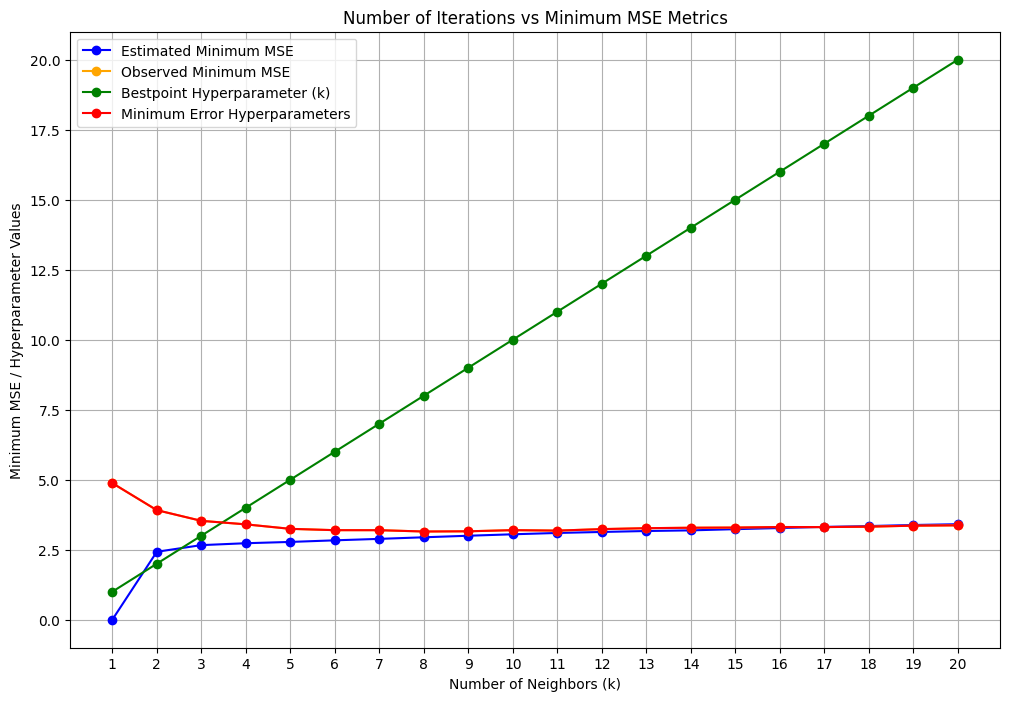

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv(r"C:\Users\athiy\OneDrive\Desktop\FSO paper Publish\fso_communication_dataset.csv")

# Check for NaN values
if df.isnull().values.any():
    print("Data contains NaN values. Please handle them before proceeding.")

# Separate features (X) and target variables (y)
X = df.drop(['SNR', 'BER'], axis=1)
y = df[['SNR', 'BER']]

# Encode categorical data (Modulation) if necessary
X = pd.get_dummies(X, columns=['Modulation'], drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize lists to store minimum MSE values
min_mse_estimated = []
min_mse_observed = []
bestpoint_hyperparameter = []
min_error_hyperparameters = []

# Set the number of iterations (for simulation)
iterations = 50  # You can change this as needed

# Iterate over different values of k
k_values = range(1, 21)

for k in k_values:
    observed_mse_list = []
    estimated_mse_list = []

    # Simulate multiple iterations for each k
    for _ in range(iterations):
        # Initialize KNN model
        knn_model = KNeighborsRegressor(n_neighbors=k)

        # Fit the model
        knn_model.fit(X_train, y_train)

        # Predictions
        y_train_pred = knn_model.predict(X_train)
        y_test_pred = knn_model.predict(X_test)

        # Calculate MSE
        observed_mse = root_mean_squared_error(y_test, y_test_pred)
        estimated_mse = root_mean_squared_error(y_train, y_train_pred)

        # Append MSE to lists
        observed_mse_list.append(observed_mse)
        estimated_mse_list.append(estimated_mse)

    # Store minimum MSE for each metric
    min_mse_observed.append(np.min(observed_mse_list))
    min_mse_estimated.append(np.min(estimated_mse_list))
    bestpoint_hyperparameter.append(k)  # Best hyperparameter based on k
    min_error_hyperparameters.append(np.mean(observed_mse_list))  # Mean error across iterations

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(k_values, min_mse_estimated, marker='o', label='Estimated Minimum MSE', color='blue')
plt.plot(k_values, min_mse_observed, marker='o', label='Observed Minimum MSE', color='orange')
plt.plot(k_values, bestpoint_hyperparameter, marker='o', label='Bestpoint Hyperparameter (k)', color='green')
plt.plot(k_values, min_error_hyperparameters, marker='o', label='Minimum Error Hyperparameters', color='red')

plt.title('Number of Iterations vs Minimum MSE Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Minimum MSE / Hyperparameter Values')
plt.xticks(k_values)  # Show all k values on the x-axis
plt.legend()
plt.grid()
plt.show()


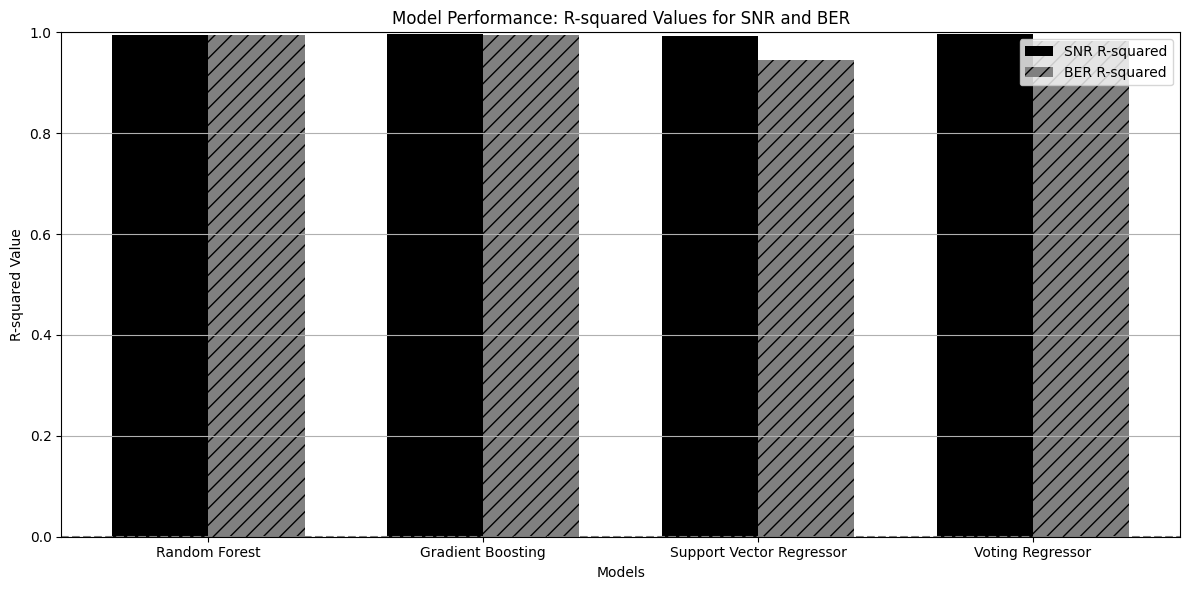

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize individual models for evaluation
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
}

# Initialize dictionaries to store R-squared scores for SNR and BER
r2_scores_snr = {}
r2_scores_ber = {}

# Fit each model to both targets and calculate R-squared scores
for model_name, model in models.items():
    # Fit the model for SNR
    model.fit(X_train, y_train['SNR'])
    snr_predictions = model.predict(X_test)
    snr_r2 = r2_score(y_test['SNR'], snr_predictions)
    r2_scores_snr[model_name] = snr_r2

    # Fit the model for BER
    model.fit(X_train, y_train['BER'])
    ber_predictions = model.predict(X_test)
    ber_r2 = r2_score(y_test['BER'], ber_predictions)
    r2_scores_ber[model_name] = ber_r2

# Add the Voting Regressor separately if needed
multi_output_model.fit(X_train, y_train)
voting_predictions = multi_output_model.predict(X_test)
voting_r2_snr = r2_score(y_test['SNR'], voting_predictions[:, 0])
voting_r2_ber = r2_score(y_test['BER'], voting_predictions[:, 1])
r2_scores_snr['Voting Regressor'] = voting_r2_snr
r2_scores_ber['Voting Regressor'] = voting_r2_ber

# Prepare data for plotting
model_names = list(models.keys()) + ['Voting Regressor']
scores_snr = list(r2_scores_snr.values())
scores_ber = list(r2_scores_ber.values())

# Set the bar width and positions
bar_width = 0.35
index = np.arange(len(model_names))

# Create a figure for the grouped bar chart
plt.figure(figsize=(12, 6))

# Plotting SNR bars (black color)
plt.bar(index, scores_snr, bar_width, label='SNR R-squared', color='black')

# Plotting BER bars (gray with crosshatch pattern)
plt.bar(index + bar_width, scores_ber, bar_width, label='BER R-squared', color='gray', hatch='//')

# Adding labels and titles
plt.xlabel('Models')
plt.ylabel('R-squared Value')
plt.title('Model Performance: R-squared Values for SNR and BER')
plt.xticks(index + bar_width / 2, model_names)
plt.ylim(0, 1)  # R-squared values range from 0 to 1
plt.axhline(y=0, color='grey', linestyle='--')
plt.grid(axis='y')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
